## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.

##A: write a executive summary to display the result you found, imagine you send it to your manager who has no technical background

##After EDA you check for missing data

2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





## Link to the project https://github.com/andynth13/Assignent-3---House-Price.git

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Answer
### Summary

#### 1. Median Sale Price and Overall Quality

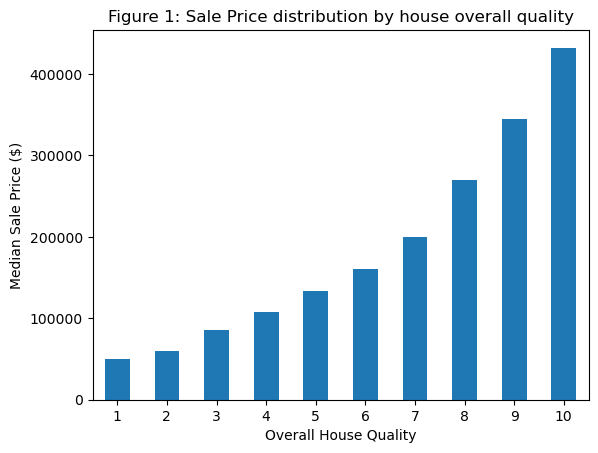

In [4]:
cond_saleprice = data.groupby('OverallQual')['SalePrice'].median()
graph = cond_saleprice.plot(kind='bar')
plt.xlabel('Overall House Quality')
plt.ylabel('Median Sale Price ($)')
plt.title('Figure 1: Sale Price distribution by house overall quality')
plt.xticks(rotation=0)
plt.show()

#### 2. Sale price and the size of the lot (Lot Area)

Text(0.5, 1.0, 'Scatter Plot of Sale Price vs. Lot size')

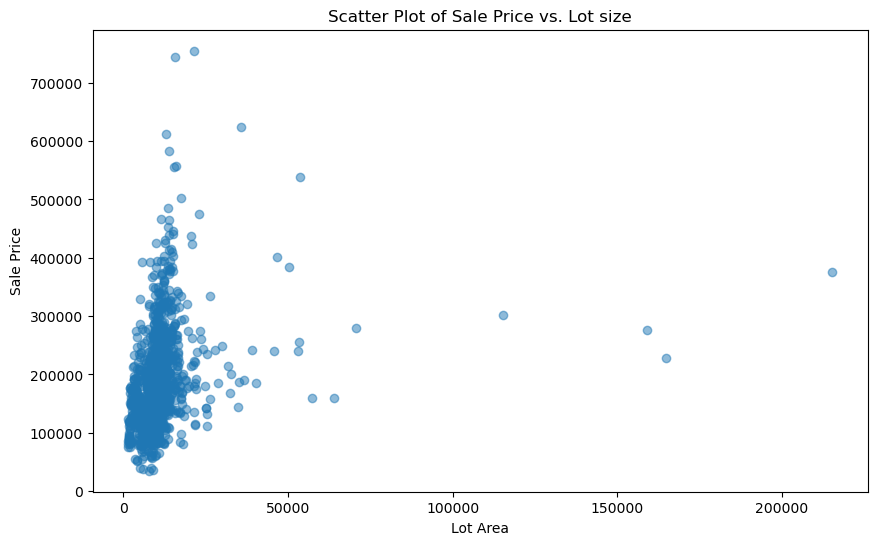

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['LotArea'], data['SalePrice'], alpha=0.5)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Sale Price vs. Lot size')

Because the Lot Area has some huge outliner so I remove it then we can have a better look on the relation between Sale price and Lot Area.

In [6]:
Q1 = data['LotArea'].quantile(0.25)
Q3 = data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['LotArea'] >= lower_bound) & (data['LotArea'] <= upper_bound)]


Text(0.5, 1.0, 'Scatter Plot of Sale Price vs. Lot Area (No Outliers)')

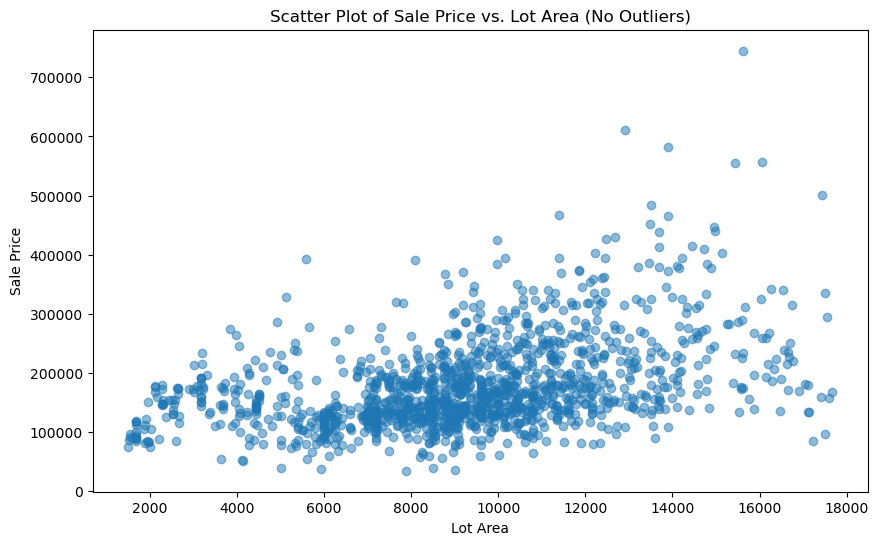

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['LotArea'], data['SalePrice'], alpha=0.5)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Sale Price vs. Lot Area (No Outliers)')

In [8]:
correlation = data['LotArea'].corr(data['SalePrice'])
correlation

0.43044213220883476

The correlation coefficient of 0.428 is a possitive value, indicating a slightly strong relationship between Sale Price and the size of Lot. It seems like when the lot size increase, the sale price also slightly increase at moderate level. Of course there is some other factors that could affect to sale price not only just the lot size.

#### 3. Sale Price and Building Age (Year Built)

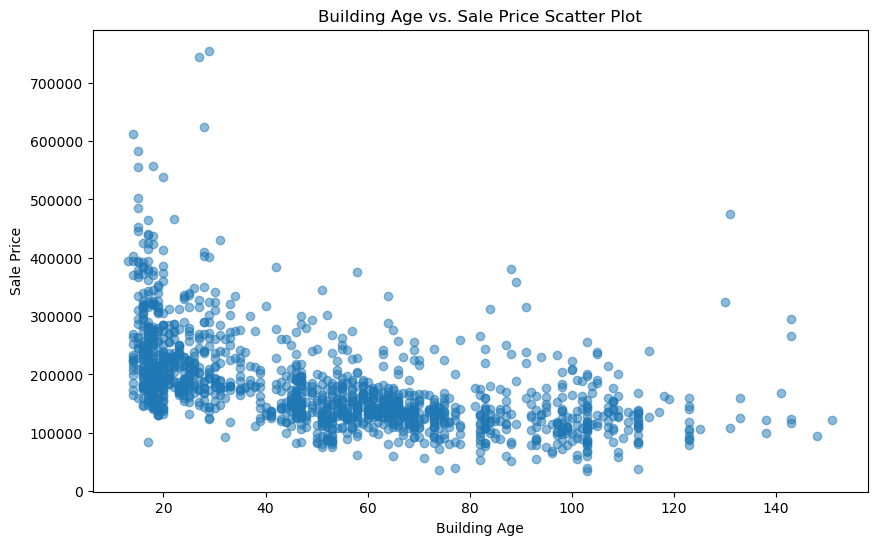

In [4]:
import datetime
current_year = datetime.datetime.now().year
data['BuildingAge'] = current_year - data['YearBuilt']


plt.figure(figsize=(10, 6))
plt.scatter(data['BuildingAge'], data['SalePrice'], alpha=0.5)
plt.xlabel('Building Age')
plt.ylabel('Sale Price')
plt.title('Building Age vs. Sale Price Scatter Plot')
plt.show()

In [14]:
correlation = data['BuildingAge'].corr(data['SalePrice'])
correlation

-0.5228973328794967

Correlation Coefficient -0.5 indicate a negative impact between 2 variables Sale Price and Building Age. It not a strong impact but we can see from the graph when the building was built long time ago tend to have lower price then the newly built one.

#### 4. Type of roof and roof material


In [28]:
dist_rstyle = data['RoofStyle'].value_counts()
value_lessthan100 = dist_rstyle[dist_rstyle < 100].index
data['RoofStyle'] = data['RoofStyle'].apply(lambda x: 'Other styles' if x in value_lessthan100 else x)
dist_rstyle = data['RoofStyle'].value_counts()
dist_rstyle

Gable           1141
Hip              286
Other styles      33
Name: RoofStyle, dtype: int64

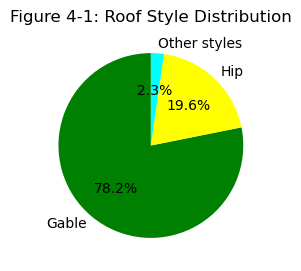

In [29]:
dist_rstyle = data['RoofStyle'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(dist_rstyle, labels = dist_rstyle.index, autopct='%1.1f%%',startangle = 90, colors = ('green', 'yellow', 'cyan'))
plt.title('Figure 4-1: Roof Style Distribution')
plt.show()

Gable and Hip are the most popular roof styles.

In [30]:
combined_material = data['RoofMatl'].value_counts()
value_lessthan5 = combined_material[combined_material < 5].index
data['RoofMatl'] = data['RoofMatl'].apply(lambda x: 'Other' if x in value_lessthan5 else x)
combined_material

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [31]:
roof_condi = pd.crosstab( data['RoofStyle'],data['RoofMatl'])
roof_condi

RoofMatl,CompShg,Other,Tar&Grv,WdShake,WdShngl
RoofStyle,,,,,
Gable,1134,1,1,0,5
Hip,282,1,0,2,1
Other styles,18,2,10,3,0


In [32]:
from scipy.stats import chi2_contingency
chi2_contingency(roof_condi)

Chi2ContingencyResult(statistic=518.632477170141, pvalue=7.059278578278459e-107, dof=8, expected_freq=array([[1.12068082e+03, 3.12602740e+00, 8.59657534e+00, 3.90753425e+00,
        4.68904110e+00],
       [2.80906849e+02, 7.83561644e-01, 2.15479452e+00, 9.79452055e-01,
        1.17534247e+00],
       [3.24123288e+01, 9.04109589e-02, 2.48630137e-01, 1.13013699e-01,
        1.35616438e-01]]))

    Chisquare is higher than decision point (518 > 15.51) and the pvalue is close to 0 indicates that we can reject the Null hypothesis: RoofStyle and Roofmat is independent, seems like there is a highly significant association or dependency between the two categorical variables. This means that the choice of roof style is significantly influenced by the type of roof material, and vice versa.

In [13]:
row_sums = roof_condi.sum(axis=1)
percentage_roof_condi = (roof_condi.div(row_sums, axis=0) * 100).round(2)
percentage_roof_condi

RoofMatl,CompShg,Other,Tar&Grv
RoofStyle,,,
Gable,99.73,0.18,0.09
Hip,98.88,1.12,0.00
Other styles,73.91,8.70,17.39


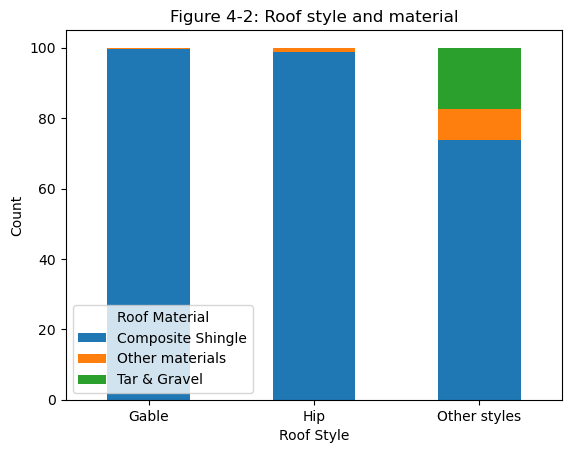

In [43]:
percentage_roof_condi.plot(kind='bar',stacked=True)
plt.xlabel('Roof Style')
plt.ylabel('Count')
plt.legend(['Composite Shingle', 'Other materials', 'Tar & Gravel', 'Wood Shakes', 'Wood Shingles'], title ='Roof Material')
plt.title('Figure 4-2: Roof style and material')
plt.xticks(rotation=0)
plt.show()


Composite Shingle is the primary material to buid roof here. Almost 100% Gable and Hip built from Composite Shingle, while Other styles has a mixed of Tar & Gravel and other materials.

### 5. External quality and External condition

In [10]:
ext_dict = {'Ex': 'Excellent', 'Fa': 'Fair', 'Gd': 'Good', 'Po': "Poor", 'TA':'Average'}
data['ExterQual'] = data['ExterQual'].replace(ext_dict)
data['ExterCond'] = data['ExterCond'].replace(ext_dict)

In [36]:
exter_counts = pd.crosstab(data['ExterCond'], data['ExterQual'])
exter_counts

ExterQual,Average,Excellent,Fair,Good
ExterCond,,,,
Average,773,48,8,453
Excellent,2,1,0,0
Fair,22,0,6,0
Good,108,3,0,35
Poor,1,0,0,0


In [35]:
from scipy.stats import chi2_contingency
chi2_contingency(exter_counts)

Chi2ContingencyResult(statistic=156.2895311162874, pvalue=2.9908872405484838e-27, dof=12, expected_freq=array([[7.95542466e+02, 1.86164384e+00, 1.73753425e+01, 9.06000000e+01,
        6.20547945e-01],
       [4.56602740e+01, 1.06849315e-01, 9.97260274e-01, 5.20000000e+00,
        3.56164384e-02],
       [1.22931507e+01, 2.87671233e-02, 2.68493151e-01, 1.40000000e+00,
        9.58904110e-03],
       [4.28504110e+02, 1.00273973e+00, 9.35890411e+00, 4.88000000e+01,
        3.34246575e-01]]))

Chisquare is high (156) and the pvalue is close to 0 indicates that we can reject the Null hypothesis: ExterCond and ExterQuality is independent. This means that when the exterior was built with better quality material, the condition will be better.

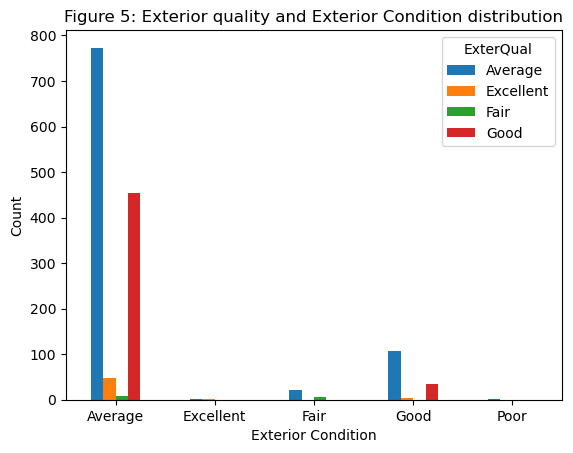

In [26]:
exter_counts.plot(kind='bar' )
plt.xlabel('Exterior Condition')
plt.ylabel('Count')
plt.title('Figure 5: Exterior quality and Exterior Condition distribution')
plt.xticks(rotation=0)
plt.show()


## Cleaning data

#### Find missing value from the data

In [21]:
count_missing = data.isna().sum()
columns_misingdata = count_missing[count_missing > 1]
columns_misingdata

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

There are 1460 entries but some columns missing more than 1000 data already, if we drop those, data will be too small for the analysis, so just keep the data as it is and perform pairwise analysis on those variables that still have significant data.